# References
## 
* 

# Parameters adjusted

# Considerations
* For now, I am using a gamma order of 10, but Williams and Baker (2009) used gaussians for their inputs.
* I added the independent noise input (which acted on the dendritic compartment) on the configuration file. Here I only change some of its parameters.
* Because Renshaw cell effects on motoneurons are inhibitory, I can separate cortical to interneuron input according to their nature. In this case, just using excitatory sinpses will do.
* Right now, I could not obtain the flat input.

In [1]:
import sys
sys.path.insert(0, '../../..')
import time
from scipy import signal
from scipy.fftpack import fft

import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [9]:
simDuration_ms = 1000
timeStep_ms = 0.05
t = np.arange(0, simDuration_ms, timeStep_ms)
availableRCs = range(600)
recordedRC = np.random.choice(availableRCs)
print 'Recorded RC #'+str(recordedRC)

Recorded RC #46


<IPython.core.display.Javascript object>


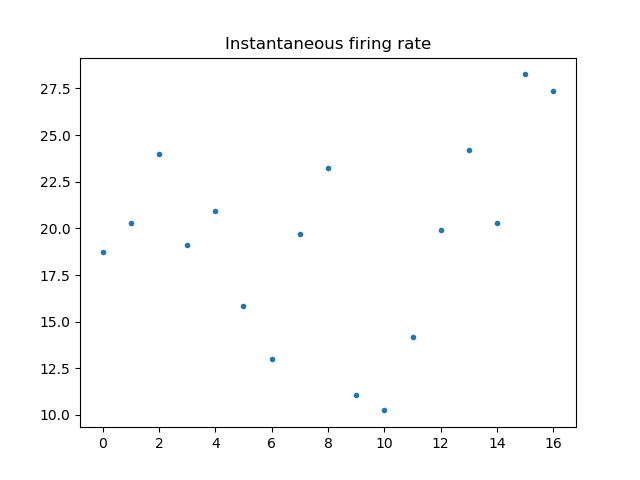

<IPython.core.display.Javascript object>


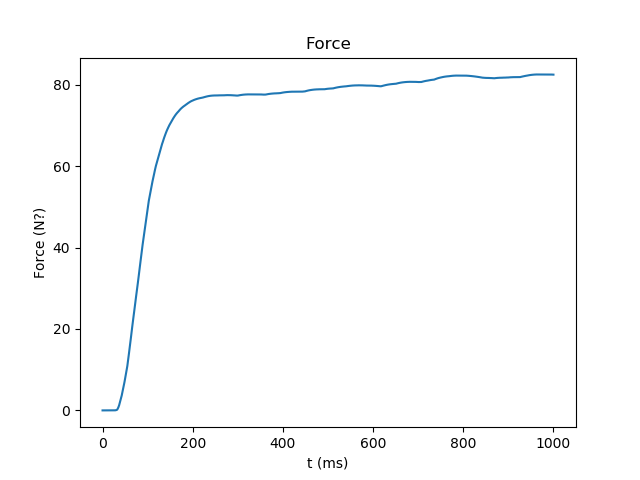

<IPython.core.display.Javascript object>


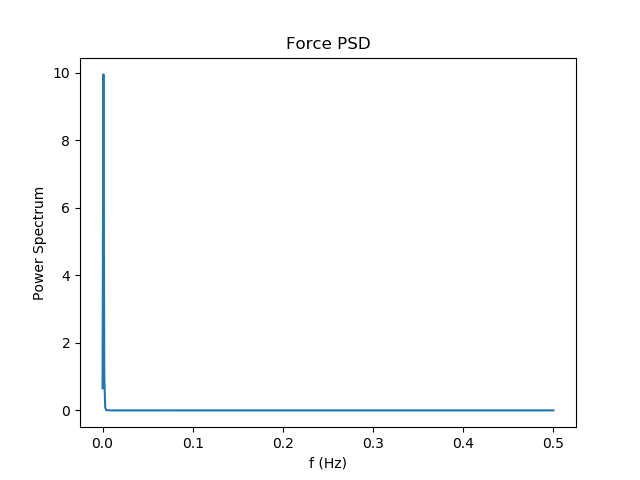

<IPython.core.display.Javascript object>


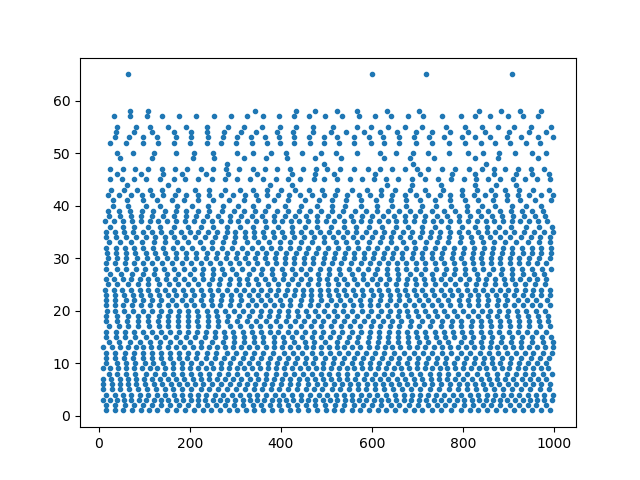

In [13]:
spikeInstant = []
unitNumber = []
force = []
instantaneousFiring = []

filename = 'frequency_analysis/output.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    spikeInstant.append(float(line.split()[0]))
    unitNumber.append(int(float(line.split()[1])))
f.close()
filename = 'frequency_analysis/force.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    force.append(float(line.split()[0]))
f.close()

RCSpikeInstants = [y for x, y in enumerate(spikeInstant) if unitNumber[x]==recordedRC]
if not any(RCSpikeInstants):
    print "No spikes for first MN"
elif len(RCSpikeInstants)==1:
    print "Length 1..."
else:
    for i in range(len(RCSpikeInstants)-1):
        instantaneousFiring = np.append(instantaneousFiring, 
           [1000/(RCSpikeInstants[i+1]-RCSpikeInstants[i])])
    plt.figure()
    plt.plot(instantaneousFiring, '.')
    plt.title('Instantaneous firing rate')
    plt.show()
    
    fs=1/(simDuration_ms*1e-3)
    window = 1024
    
    plt.figure()
    plt.plot(t, force)
    plt.title('Force')
    plt.xlabel('t (ms)')
    plt.ylabel('Force (N?)')
    plt.show()
    
    staticForce = [y for x,y in enumerate(force) if t[x]>500]
#     f2, Pxx = signal.welch(signal.detrend(staticForce), fs, nperseg=window)
    f2, Pxx = signal.welch(staticForce, fs, nperseg=window)
    
    plt.figure()
    plt.plot(f2, Pxx)
    plt.title('Force PSD')
    plt.xlabel('f (Hz)')
    plt.ylabel('Power Spectrum')
#     plt.xlim((0, 500))
    plt.show()

plt.figure()
plt.plot(spikeInstant, unitNumber, '.')
plt.show()